In [2]:
%matplotlib inline

from SSA import SSA

import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (12, 6)

## SSA concepts demonstration

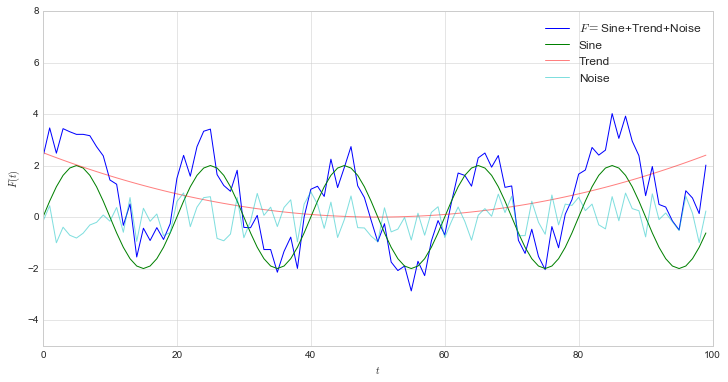

In [3]:
N = 100
t = np.arange(0, N)
trend = 0.001 * (t - 50) ** 2
p1, p2 = 20, 30
_sin = 2 * np.sin(2*pi*t/p1)

np.random.seed(1)
noise = 2 * (np.random.rand(N) - 0.5)
F = trend + _sin + noise

plt.ylim(-5, 8)
plt.plot(t, F)
plt.plot(t, _sin)
plt.plot(t, trend, alpha=0.5)
plt.plot(t, noise, alpha=0.5)
plt.legend(["$F=$Sine+Trend+Noise", "Sine", "Trend", "Noise"])
plt.xlabel("$t$")
plt.ylabel("$F(t)$");

## London. SSA for Time Series (L = 30 years)

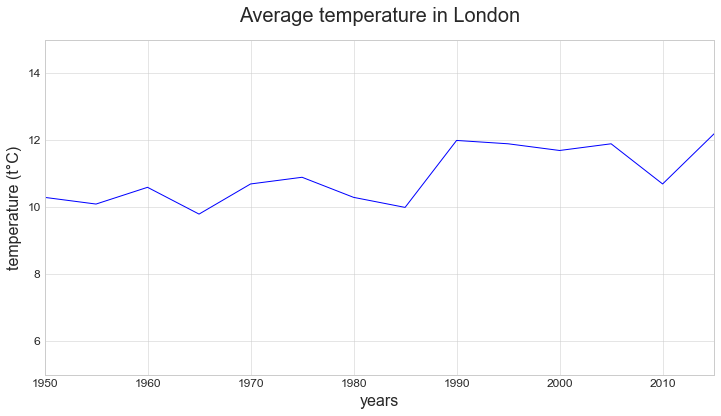

In [4]:
london_df = pd.read_csv('cities_data/london.csv', index_col=0, usecols=["0"] + 
                        [str(1950 + k * 5) for k in range(0, 14)]).transpose()
london_df.plot(kind='line', fontsize="12")

plt.title("Average temperature in London", fontsize="20", y=1.04)
plt.xlabel('years', fontsize="16")
plt.ylabel('temperature (t°C)', fontsize="16")

plt.ylim(5, 15)
plt.legend().remove()
plt.show();

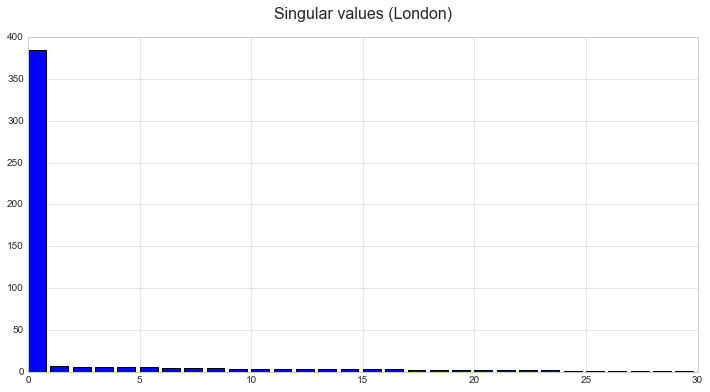

In [6]:
london_df = pd.read_csv('cities_data/london.csv', index_col=0).transpose()

ssa_london = SSA(london_df.ix[:,0], 30)
london_comps = ssa_london.components_to_df()

plt.title("Singular values (London)", fontsize="16", y=1.04)
plt.bar(np.arange(ssa_london.d), ssa_london.Sigma[:30]);

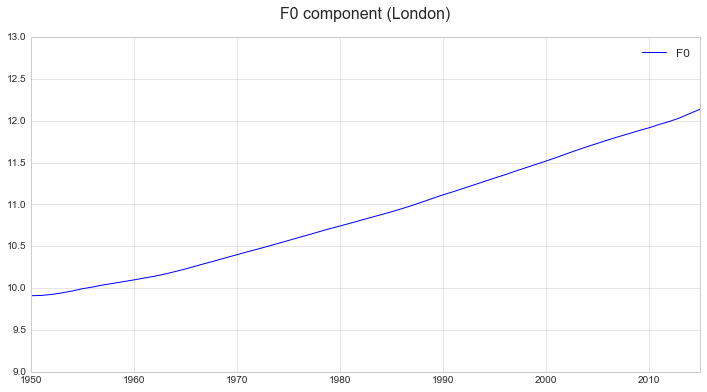

In [7]:
plt.xlim(1950, 2015)
plt.ylim(9, 13)

plt.title("F0 component (London)", fontsize="16", y=1.04)
plt.plot(london_comps.iloc[:,0])
plt.legend();

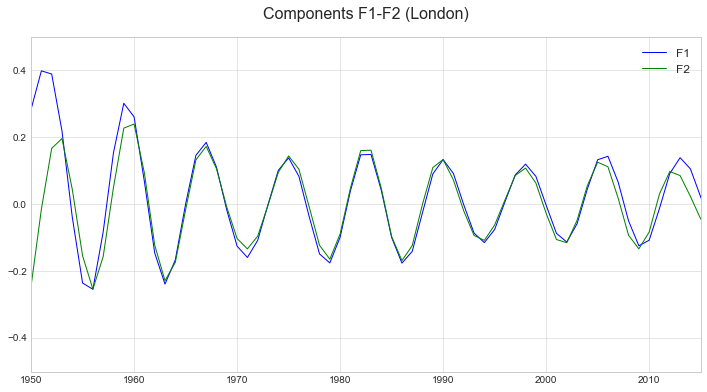

In [10]:
plt.xlim(1950, 2015)
plt.ylim(-0.5, 0.5)

plt.title("Components F1-F2 (London)", fontsize="16", y=1.04)
for i in range(1, 3):
    plt.plot(london_comps.iloc[:,i])
plt.legend();

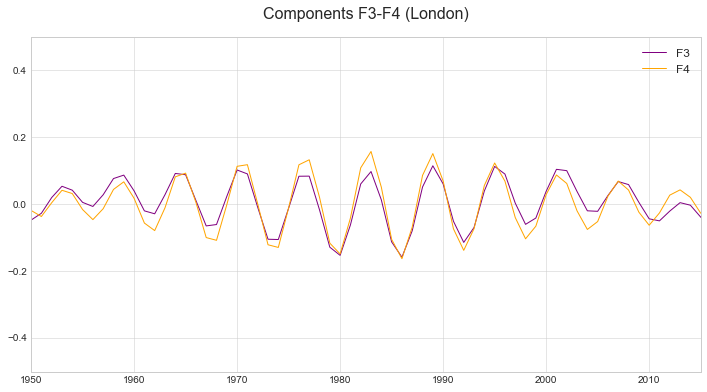

In [61]:
plt.xlim(1950, 2015)
plt.ylim(-0.5, 0.5)
colors = ["purple", "orange"]

plt.title("Components F3-F4 (London)", fontsize="16", y=1.04)
for i in range(3, 5):
    plt.plot(london_comps.iloc[:,i], color=colors[i - 3])
plt.legend();

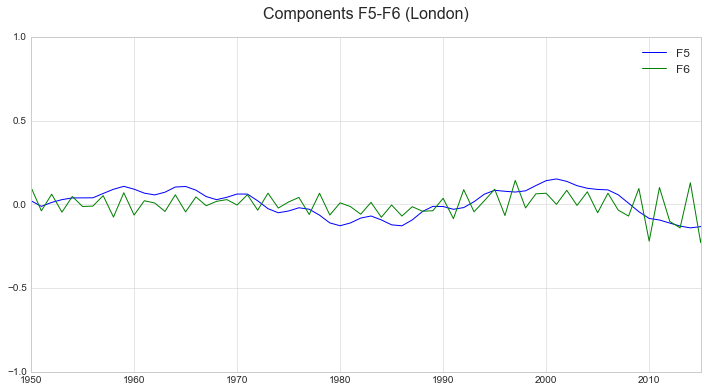

In [17]:
plt.xlim(1950, 2015)
plt.ylim(-1, 1)

plt.title("Components F5-F6 (London)", fontsize="16", y=1.04)
for i in range(5, 7):
    plt.plot(london_comps.iloc[:,i])
plt.legend();

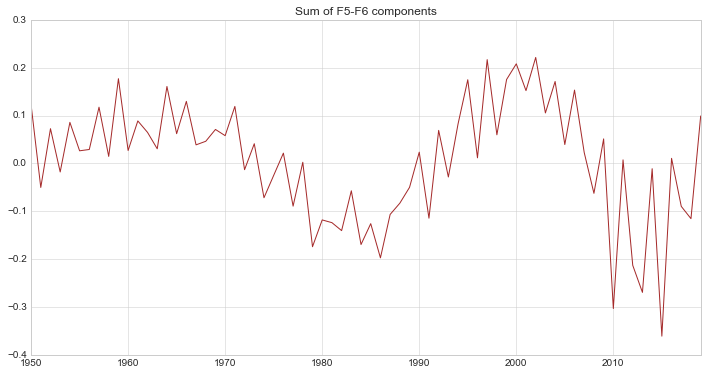

In [62]:
ssa_london.reconstruct([5, 6]).plot(figsize=(12, 6), title='Sum of F5-F6 components', color="brown")
plt.grid(True)
plt.show()

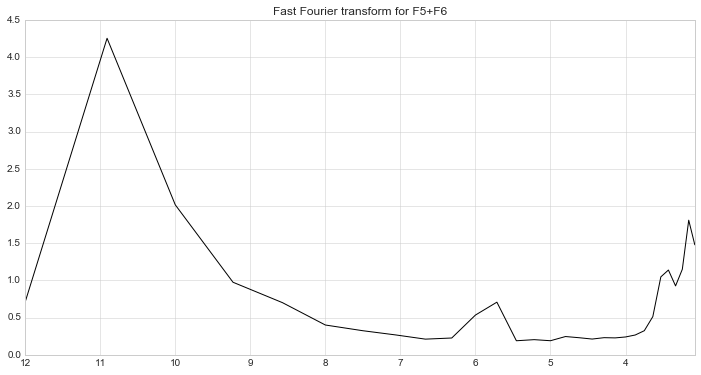

In [145]:
fft_london = np.abs(np.fft.rfft(ssa_london.reconstruct([5, 6])))
plt.figure(figsize=(12, 6))
plt.plot(120 / (np.arange(30) + 10), fft_london[1:31], color="black")
plt.xlim((120 / (np.arange(30) + 10))[0], (120 / (np.arange(30) + 10))[-1])
plt.title('Fast Fourier transform for F5+F6')
plt.grid(True)
plt.show()

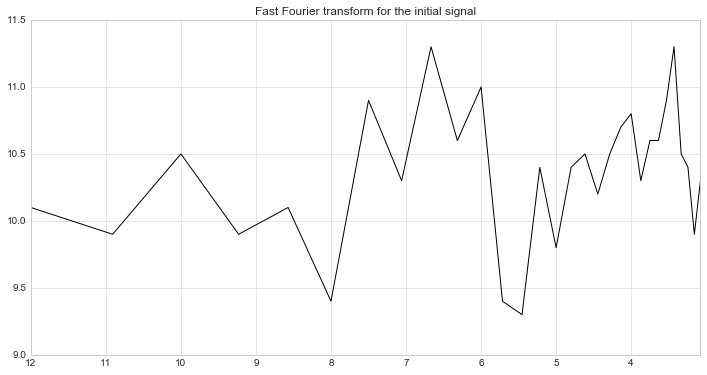

In [66]:
fft_london = np.abs(np.fft.rfft(london_df))
plt.figure(figsize=(12, 6))
plt.plot(120 / (np.arange(30) + 10), fft_london[1:31], color="black")
plt.xlim((120 / (np.arange(30) + 10))[0], (120 / (np.arange(30) + 10))[-1])
plt.title('Fast Fourier transform for the initial signal')
plt.grid(True)
plt.show()

## Paris. SSA for Time Series (L = 50 years)

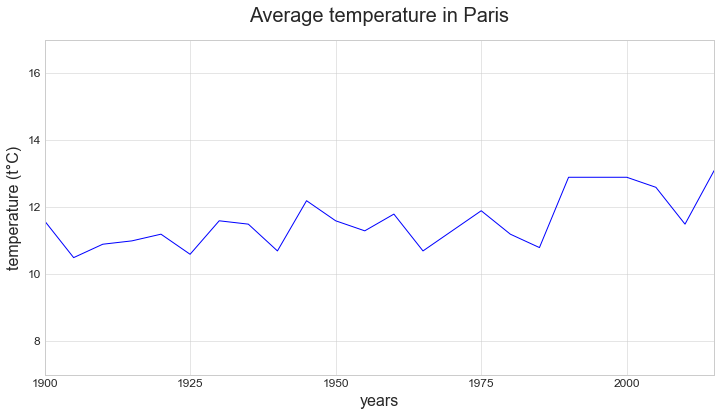

In [7]:
paris_df = pd.read_csv('cities_data/paris.csv', index_col=0, usecols=["0"] +
                       [str(1900 + k * 5) for k in range(0, 24)]).transpose()
paris_df.plot(kind='line', fontsize="12")

plt.title("Average temperature in Paris", fontsize="20", y=1.04)
plt.xlabel('years', fontsize="16")
plt.ylabel('temperature (t°C)', fontsize="16")

plt.ylim(7, 17)
plt.legend().remove();

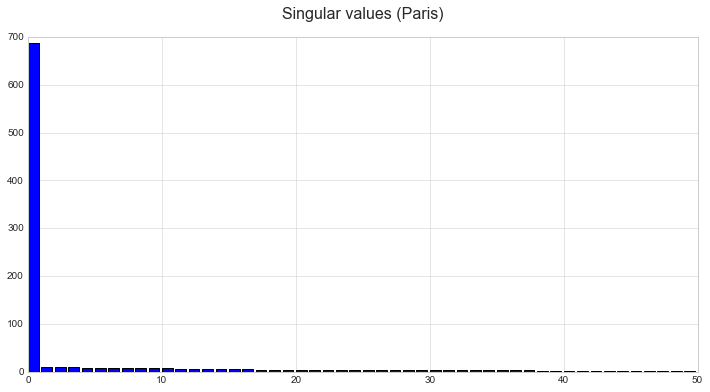

In [68]:
paris_df = pd.read_csv('cities_data/paris.csv', index_col=0).transpose()

ssa_paris = SSA(paris_df.ix[:,0], 50)
paris_comps = ssa_paris.components_to_df()

plt.title("Singular values (Paris)", fontsize="16", y=1.04)
plt.bar(np.arange(ssa_paris.d), ssa_paris.Sigma[:50]);

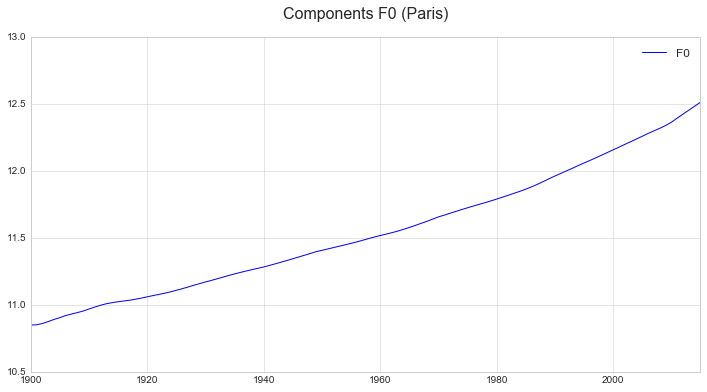

In [69]:
plt.xlim(1900, 2015)

plt.title("Components F0 (Paris)", fontsize="16", y=1.04)
plt.plot(paris_comps.iloc[:,0])
plt.legend();

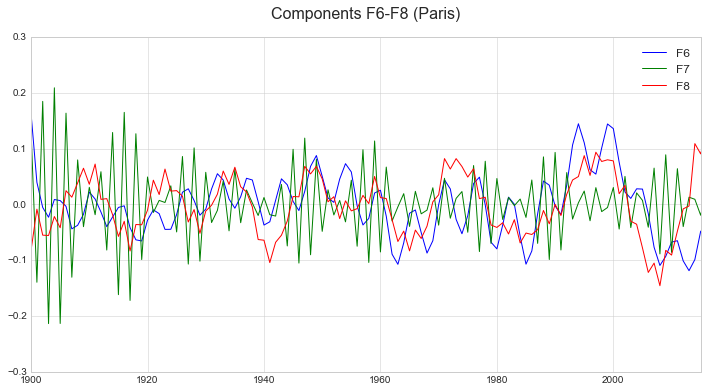

In [70]:
plt.xlim(1900, 2015)
plt.ylim(-0.3, 0.3)

plt.title("Components F6-F8 (Paris)", fontsize="16", y=1.04)
for i in range(6, 9):
    plt.plot(paris_comps.iloc[:,i])
plt.legend();

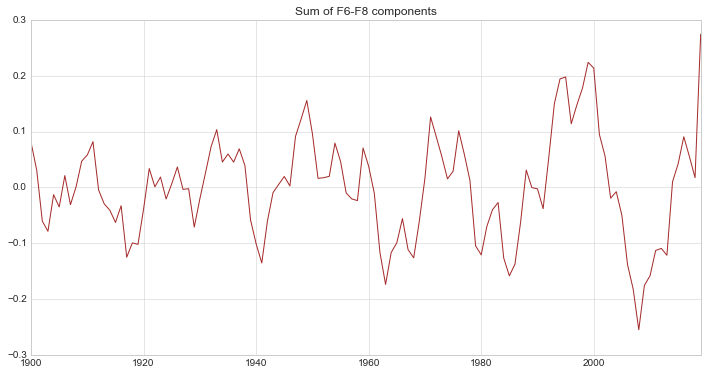

In [71]:
ssa_paris.reconstruct([6, 8]).plot(figsize=(12, 6), title='Sum of F6-F8 components', color="brown")
plt.grid(True)
plt.show()

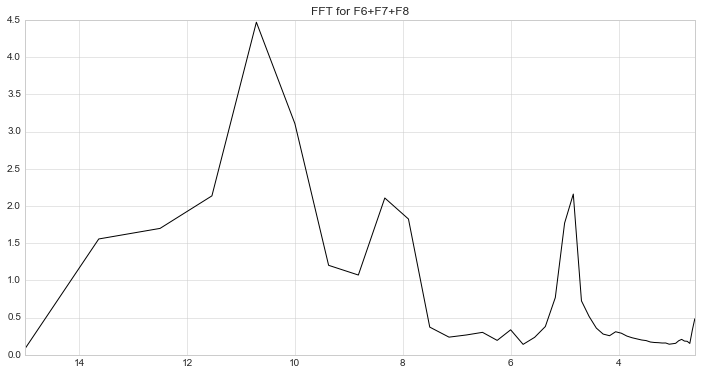

In [73]:
fft_paris = np.abs(np.fft.rfft(ssa_paris.reconstruct([6, 8])))
plt.figure(figsize=(12, 6))
plt.plot(150 / (np.arange(49) + 10), fft_paris[1:50], color="black")
plt.xlim((150 / (np.arange(49) + 10))[0], (150 / (np.arange(49) + 10))[-1])
plt.title('FFT for F6+F7+F8')
plt.grid(True)
plt.show()

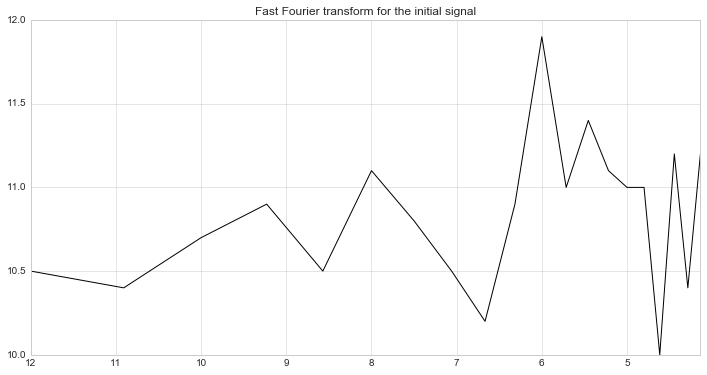

In [77]:
fft_paris = np.abs(np.fft.rfft(paris_df))
plt.figure(figsize=(12, 6))
plt.plot(120 / (np.arange(20) + 10), fft_paris[1:21], color="black")
plt.xlim((120 / (np.arange(20) + 10))[0], (120 / (np.arange(20) + 10))[-1])
plt.title('Fast Fourier transform for the initial signal')
plt.grid(True)
plt.show()

## Lisbon. SSA for Time Series (L = 50 years)

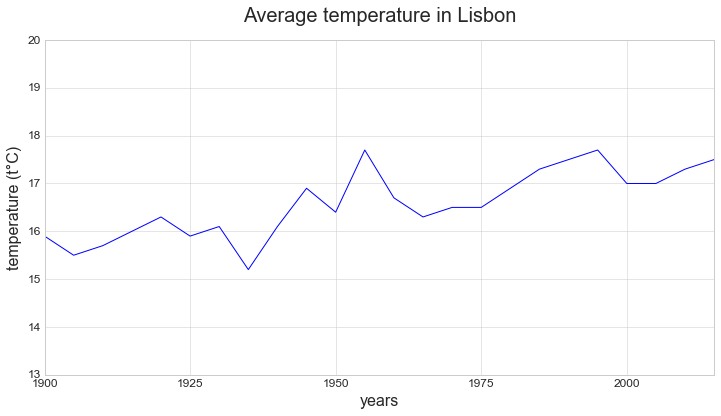

In [79]:
lisbon_df = pd.read_csv('cities_data/lisbon.csv', index_col=0, usecols=["0"] +
                        [str(1900 + k * 5) for k in range(0, 24)]).transpose()
lisbon_df.plot(kind='line', fontsize="12")

plt.title("Average temperature in Lisbon", fontsize="20", y=1.04)
plt.xlabel('years', fontsize="16")
plt.ylabel('temperature (t°C)', fontsize="16")

plt.ylim(13, 20)
plt.legend().remove();

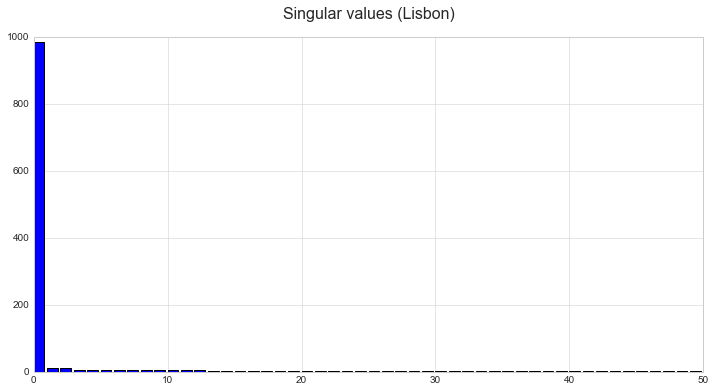

In [80]:
lisbon_df = pd.read_csv('cities_data/lisbon.csv', index_col=0).transpose()

ssa_lisbon = SSA(lisbon_df.ix[:,0], 50)
lisbon_comps = ssa_lisbon.components_to_df()

plt.title("Singular values (Lisbon)", fontsize="16", y=1.04)
plt.bar(np.arange(ssa_lisbon.d), ssa_lisbon.Sigma[:50]);

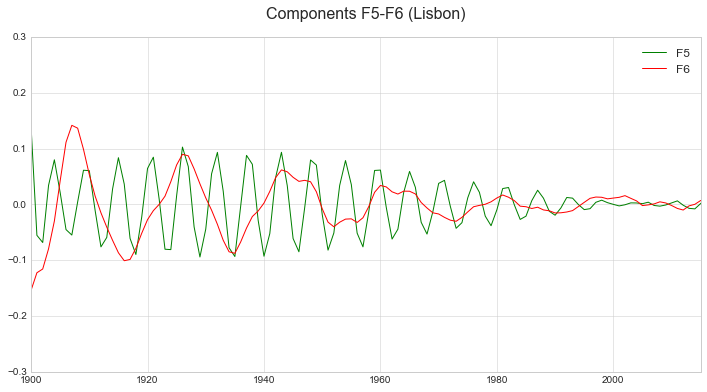

In [83]:
plt.xlim(1900, 2015)
plt.ylim(-0.3, 0.3)
colors = ["green", "red"]

plt.title("Components F5-F6 (Lisbon)", fontsize="16", y=1.04)
for i in range(5, 7):
    plt.plot(lisbon_comps.iloc[:,i], color=colors[i - 5])
plt.legend();

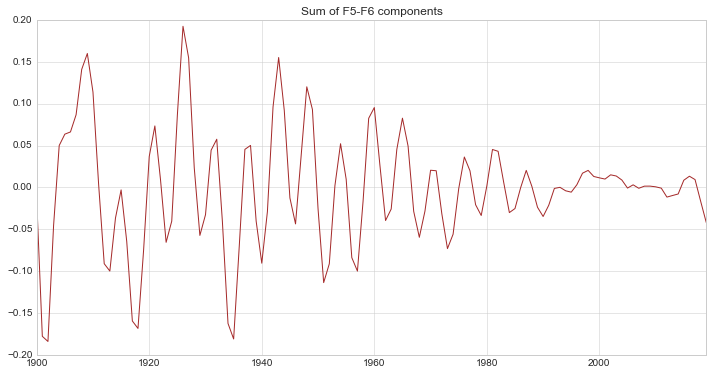

In [84]:
ssa_lisbon.reconstruct([5, 6]).plot(figsize=(12, 6), title='Sum of F5-F6 components', color="brown")
plt.grid(True)
plt.show()

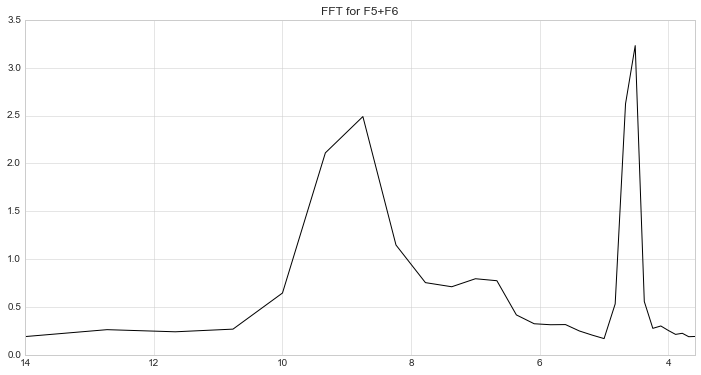

In [101]:
fft_lisbon = np.abs(np.fft.rfft(ssa_lisbon.reconstruct([5, 6])))
plt.figure(figsize=(12, 6))
plt.plot(140 / (np.arange(30) + 10), fft_lisbon[1:31], color="black")
plt.xlim((140 / (np.arange(30) + 10))[0], (140 / (np.arange(30) + 10))[-1])
plt.title('FFT for F5+F6')
plt.grid(True)
plt.show()

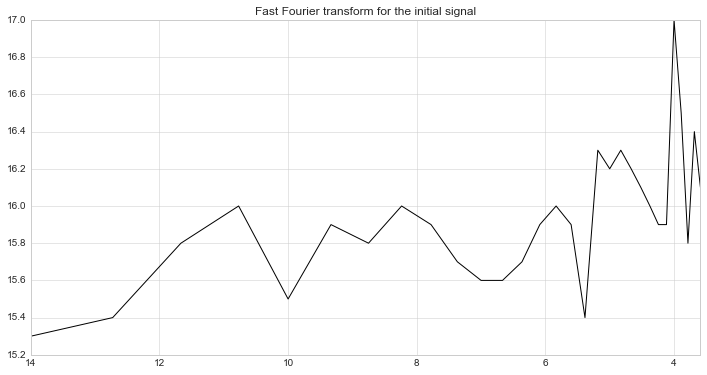

In [102]:
fft_lisbon = np.abs(np.fft.rfft(lisbon_df))
plt.figure(figsize=(12, 6))
plt.plot(140 / (np.arange(30) + 10), fft_lisbon[1:31], color="black")
plt.xlim((140 / (np.arange(30) + 10))[0], (140 / (np.arange(30) + 10))[-1])
plt.title('Fast Fourier transform for the initial signal')
plt.grid(True)
plt.show()

## Sydney. SSA for Time Series (L = 75 years)

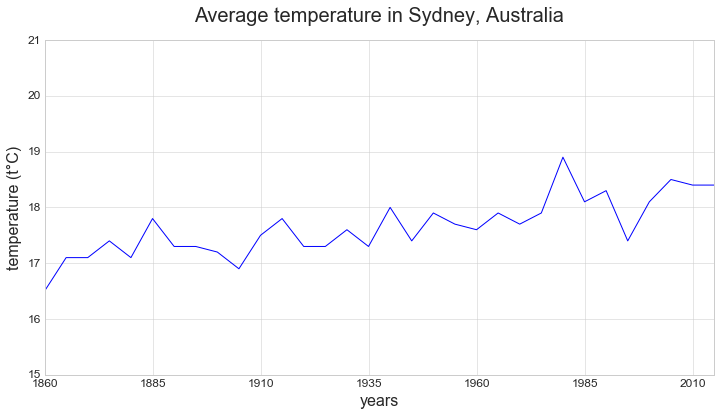

In [6]:
sydney_df = pd.read_csv('cities_data/sydney.csv', index_col=0, usecols=["0"] +
                        [str(1860 + k * 5) for k in range(0, 32)]).transpose()
sydney_df.plot(kind='line', fontsize="12")

plt.title("Average temperature in Sydney, Australia", fontsize="20", y=1.04)
plt.xlabel('years', fontsize="16")
plt.ylabel('temperature (t°C)', fontsize="16")

plt.ylim(15, 21)
plt.legend().remove();

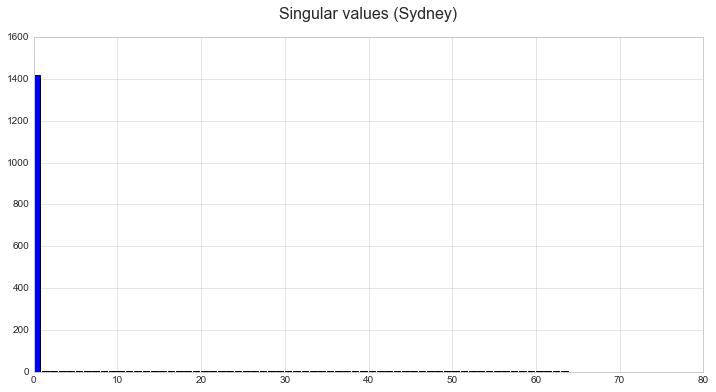

In [7]:
sydney_df = pd.read_csv('cities_data/sydney.csv', index_col=0).transpose()

ssa_sydney = SSA(sydney_df.ix[:,0], 75)
sydney_comps = ssa_sydney.components_to_df()

plt.title("Singular values (Sydney)", fontsize="16", y=1.04)
plt.bar(np.arange(ssa_sydney.d), ssa_sydney.Sigma[:75]);

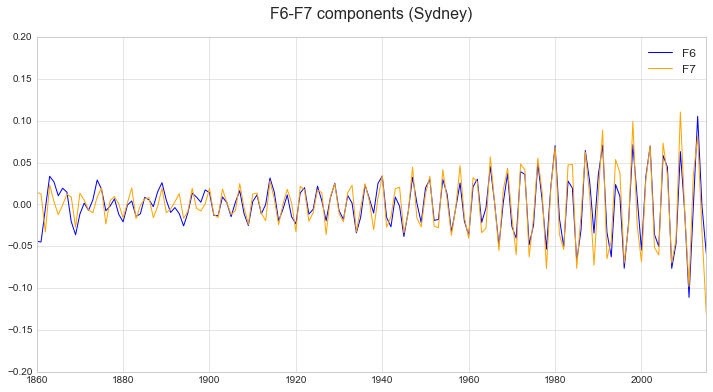

In [103]:
plt.xlim(1860, 2015)
plt.ylim(-0.2, 0.2)
colors = ["blue", "orange"]

plt.title("F6-F7 components (Sydney)", fontsize="16", y=1.04)
for i in range(6, 8):
    plt.plot(sydney_comps.iloc[:,i], color=colors[i - 6])
plt.legend();

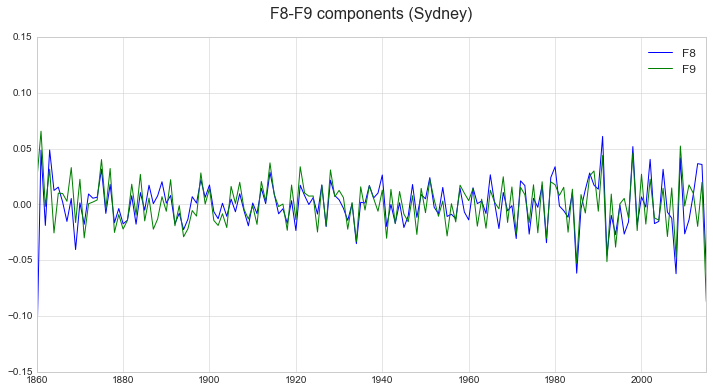

In [9]:
plt.xlim(1860, 2015)
plt.ylim(-0.15, 0.15)

plt.title("F8-F9 components (Sydney)", fontsize="16", y=1.04)
for i in range(8, 10):
    plt.plot(sydney_comps.iloc[:,i])
plt.legend();

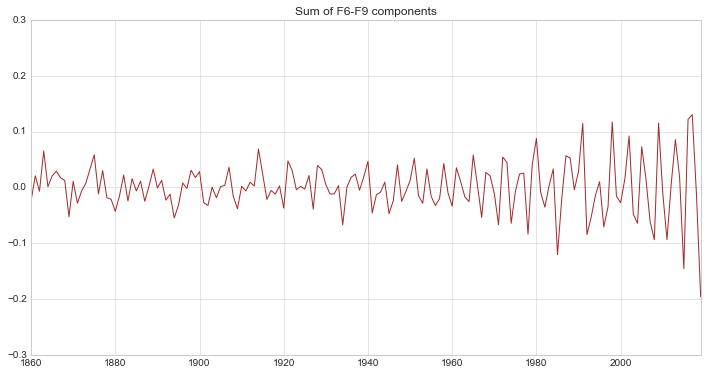

In [10]:
plt.ylim(-0.3, 0.3)

ssa_sydney.reconstruct([6, 9]).plot(figsize=(12, 6), title='Sum of F6-F9 components', color="brown")
plt.grid(True)
plt.show()

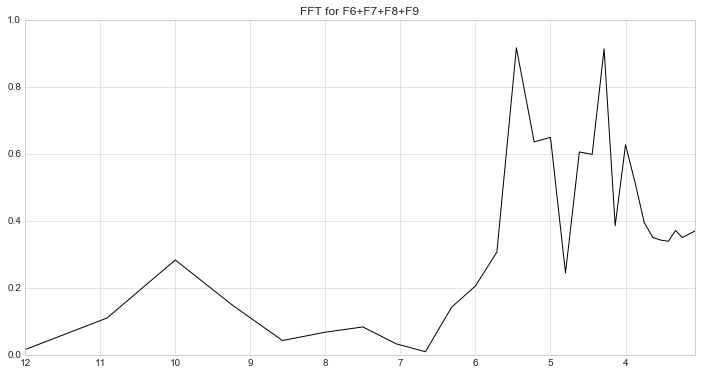

In [14]:
fft_sydney = np.abs(np.fft.rfft(ssa_sydney.reconstruct([6, 9])))
plt.figure(figsize=(12, 6))
plt.plot(120 / (np.arange(30) + 10), fft_sydney[1:31], color="black")
plt.xlim((120 / (np.arange(30) + 10))[0], (120 / (np.arange(30) + 10))[-1])
plt.title('FFT for F6+F7+F8+F9')
plt.grid(True)
plt.show()

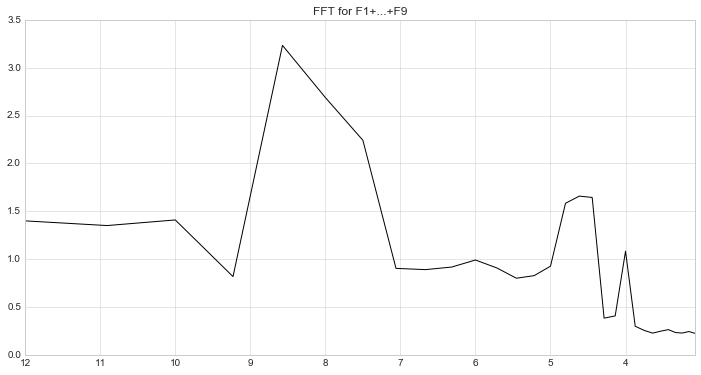

In [15]:
fft_sydney = np.abs(np.fft.rfft(ssa_sydney.reconstruct([1, 9])))
plt.figure(figsize=(12, 6))
plt.plot(120 / (np.arange(30) + 10), fft_sydney[1:31], color="black")
plt.xlim((120 / (np.arange(30) + 10))[0], (120 / (np.arange(30) + 10))[-1])
plt.title('FFT for F1+...+F9')
plt.grid(True)
plt.show()

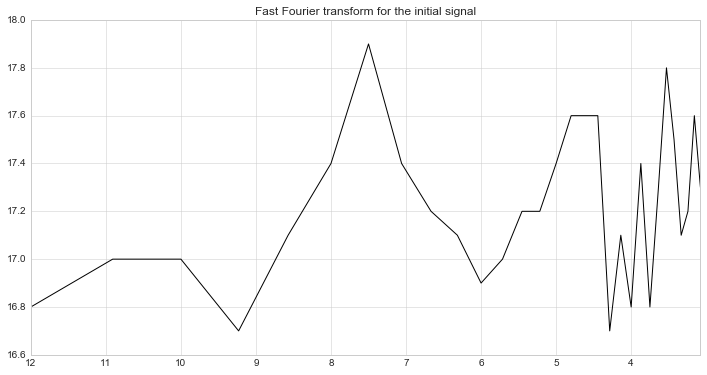

In [114]:
fft_sydney = np.abs(np.fft.rfft(sydney_df))
plt.figure(figsize=(12, 6))
plt.plot(120 / (np.arange(30) + 10), fft_sydney[1:31], color="black")
plt.xlim((120 / (np.arange(30) + 10))[0], (120 / (np.arange(30) + 10))[-1])
plt.title('Fast Fourier transform for the initial signal')
plt.grid(True)
plt.show()

## Moscow. SSA for Time Series (L = 20 years)

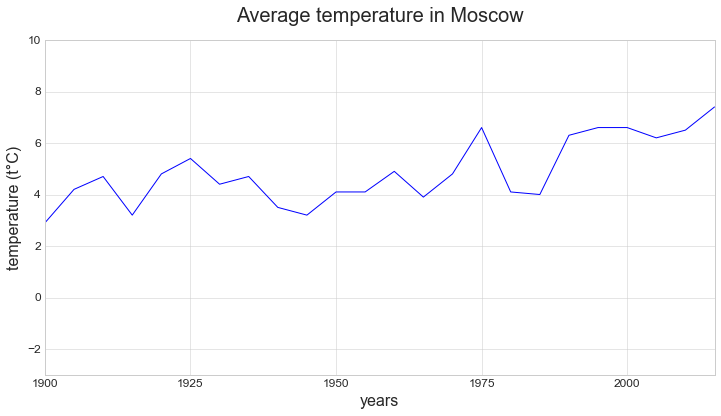

In [116]:
moscow_df = pd.read_csv('cities_data/moscow.csv', index_col=0, usecols=["0"] +
                        [str(1900 + k * 5) for k in range(0, 24)]).transpose()
moscow_df.plot(kind='line', fontsize="12")

plt.title("Average temperature in Moscow", fontsize="20", y=1.04)
plt.xlabel('years', fontsize="16")
plt.ylabel('temperature (t°C)', fontsize="16")

plt.ylim(-3, 10)
plt.legend().remove();

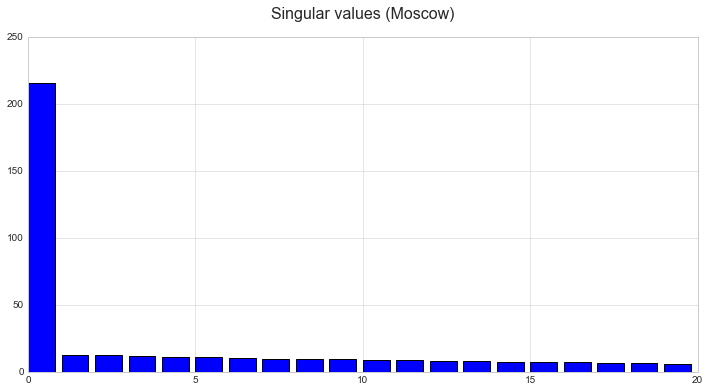

In [117]:
moscow_df = pd.read_csv('cities_data/moscow.csv', index_col=0).transpose()

ssa_moscow = SSA(moscow_df.ix[:,0], 20)
moscow_comps = ssa_moscow.components_to_df()

plt.title("Singular values (Moscow)", fontsize="16", y=1.04)
plt.bar(np.arange(ssa_moscow.d), ssa_moscow.Sigma[:20]);

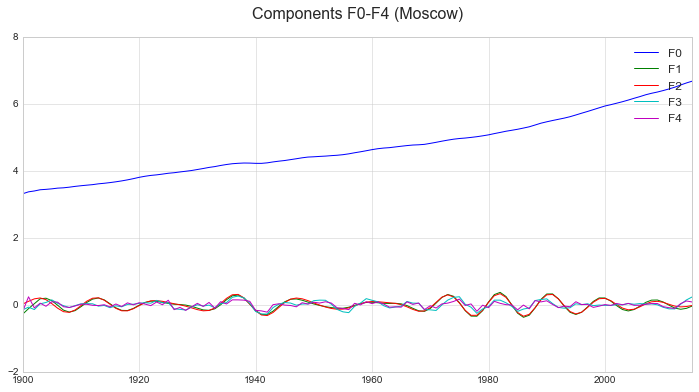

In [118]:
plt.xlim(1900, 2015)
plt.ylim(-2, 8)

plt.title("Components F0-F4 (Moscow)", fontsize="16", y=1.04)
for i in range(5):
    plt.plot(moscow_comps.iloc[:,i])
plt.legend();

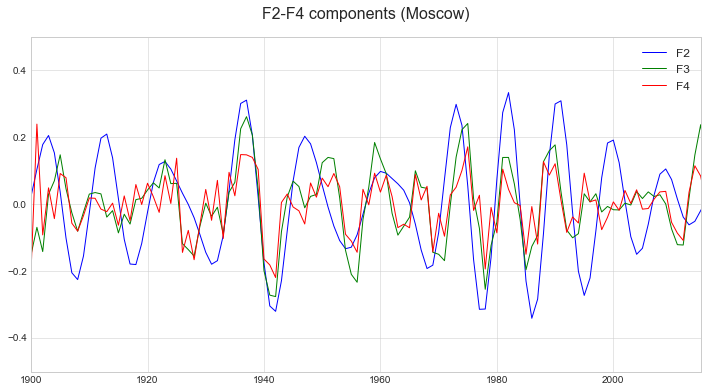

In [119]:
plt.xlim(1900, 2015)
plt.ylim(-0.5, 0.5)

plt.title("F2-F4 components (Moscow)", fontsize="16", y=1.04)
for i in range(2, 5):
    plt.plot(moscow_comps.iloc[:,i])
plt.legend();

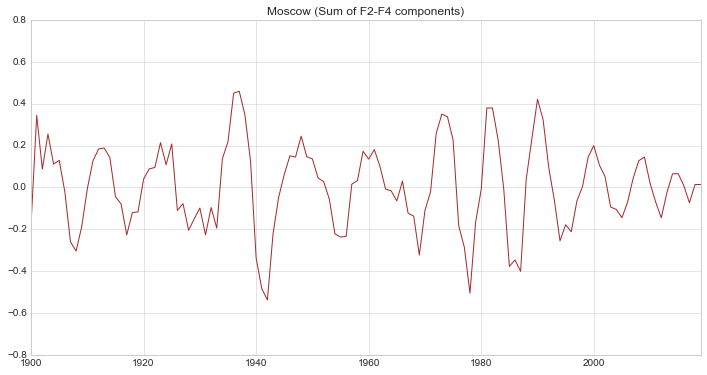

In [120]:
plt.ylim(-0.8, 0.8)
ssa_moscow.reconstruct([2, 4]).plot(figsize=(12, 6), title="Moscow (Sum of F2-F4 components)", color="brown")

plt.grid(True)
plt.show()

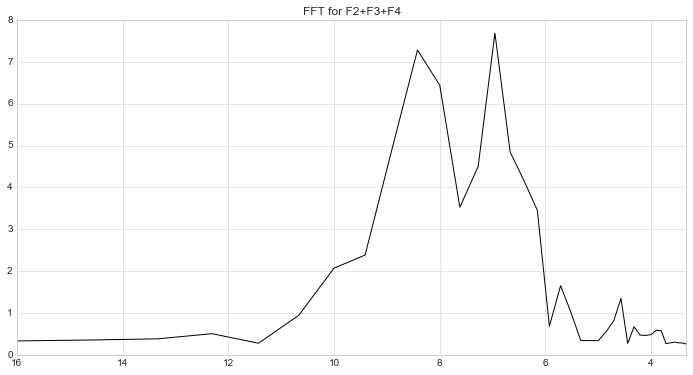

In [121]:
fft_moscow = np.abs(np.fft.rfft(ssa_moscow.reconstruct([2, 4])))

plt.figure(figsize=(12, 6))
plt.plot(160 / (np.arange(39) + 10), fft_moscow[1:40], color="black")
plt.xlim((160 / (np.arange(39) + 10))[0], (160 / (np.arange(39) + 10))[-1])

plt.title('FFT for F2+F3+F4')
plt.grid(True)
plt.show()

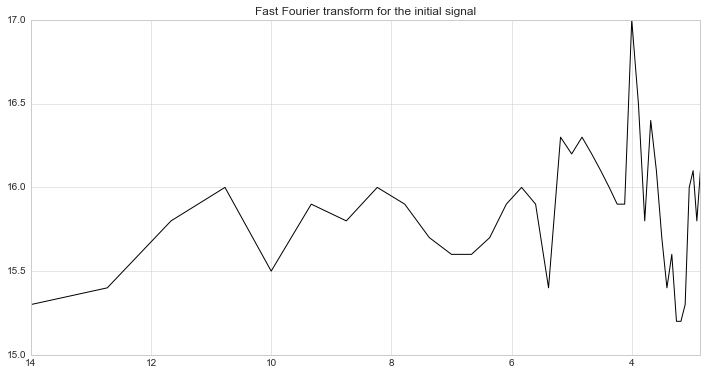

In [125]:
fft_moscow = np.abs(np.fft.rfft(moscow_df))
plt.figure(figsize=(12, 6))
plt.plot(140 / (np.arange(40) + 10), fft_lisbon[1:41], color="black")
plt.xlim((140 / (np.arange(40) + 10))[0], (140 / (np.arange(40) + 10))[-1])
plt.title('Fast Fourier transform for the initial signal')
plt.grid(True)
plt.show()

## Yakutsk. SSA for Time Series (L = 10 years)

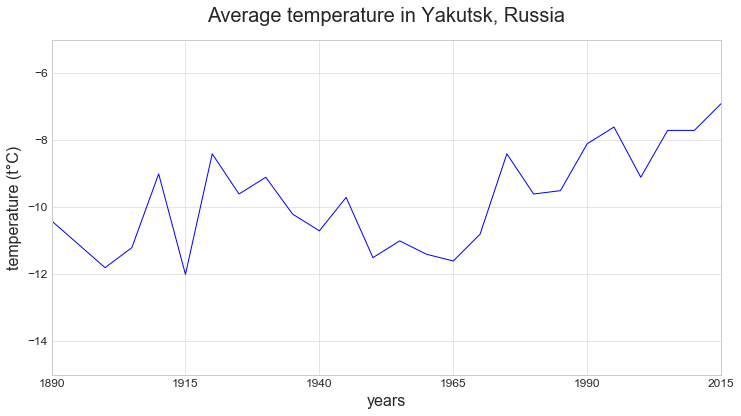

In [126]:
yakutsk_df = pd.read_csv('cities_data/yakutsk.csv', index_col=0, usecols=["0"] +
                         [str(1890 + k * 5) for k in range(0, 26)]).transpose()
yakutsk_df.plot(kind='line', fontsize="12")

plt.title("Average temperature in Yakutsk, Russia", fontsize="20", y=1.04)
plt.xlabel('years', fontsize="16")
plt.ylabel('temperature (t°C)', fontsize="16")

plt.ylim(-15, -5)
plt.legend().remove();

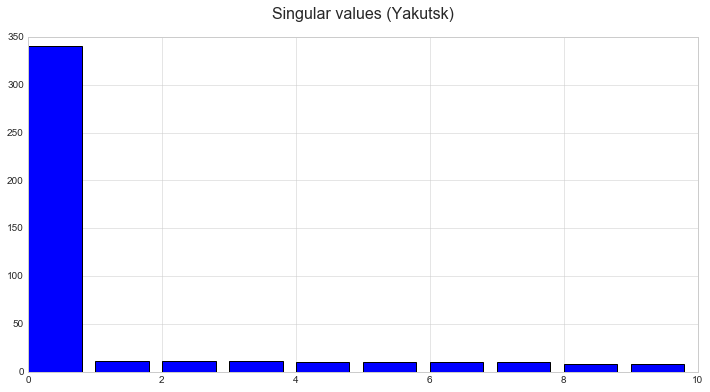

In [127]:
yakutsk_df = pd.read_csv('cities_data/yakutsk.csv', index_col=0).transpose()

ssa_yakutsk = SSA(yakutsk_df.ix[:,0], 10)
yakutsk_comps = ssa_yakutsk.components_to_df()

plt.title("Singular values (Yakutsk)", fontsize="16", y=1.04)
plt.bar(np.arange(ssa_yakutsk.d), ssa_yakutsk.Sigma[:10]);

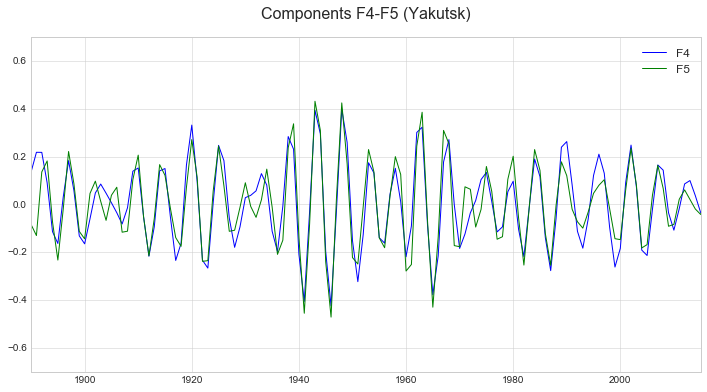

In [128]:
plt.xlim(1890, 2015)
plt.ylim(-0.7, 0.7)

plt.title("Components F4-F5 (Yakutsk)", fontsize="16", y=1.04)
for i in range(4, 6):
    plt.plot(yakutsk_comps.iloc[:,i])
plt.legend();

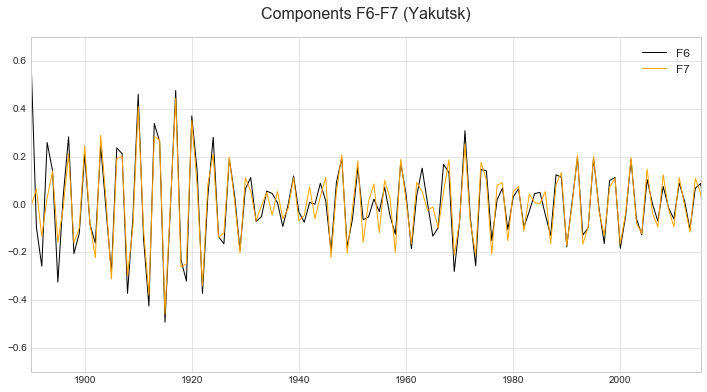

In [139]:
plt.xlim(1890, 2015)
plt.ylim(-0.7, 0.7)
colors = ["black", "orange"]

plt.title("Components F6-F7 (Yakutsk)", fontsize="16", y=1.04)
for i in range(6, 8):
    plt.plot(yakutsk_comps.iloc[:,i], color=colors[i - 6])
plt.legend();

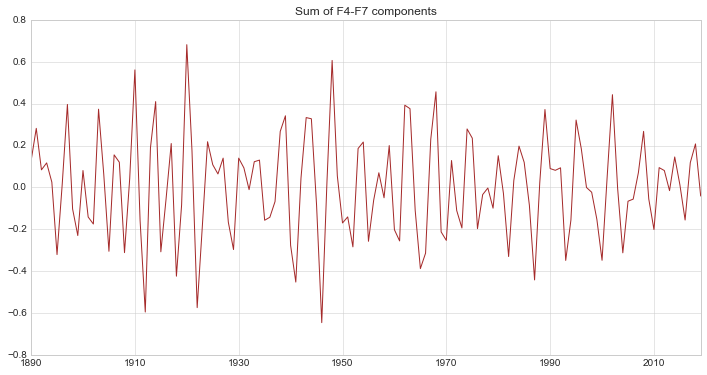

In [133]:
ssa_yakutsk.reconstruct([4, 7]).plot(figsize=(12, 6), title='Sum of F4-F7 components', color="brown")
plt.grid(True)
plt.show()

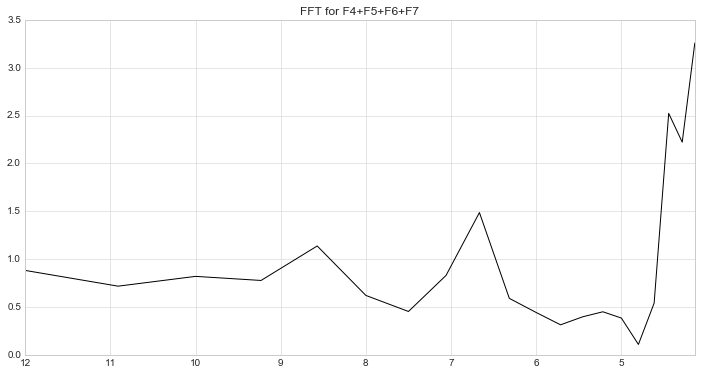

In [146]:
fft_yakutsk = np.abs(np.fft.rfft(ssa_yakutsk.reconstruct([4, 7])))

plt.figure(figsize=(12, 6))
plt.plot(120 / (np.arange(20) + 10), fft_yakutsk[1:21], color="black")
plt.xlim((120 / (np.arange(20) + 10))[0], (120 / (np.arange(20) + 10))[-1])

plt.title('FFT for F4+F5+F6+F7')
plt.grid(True)
plt.show()

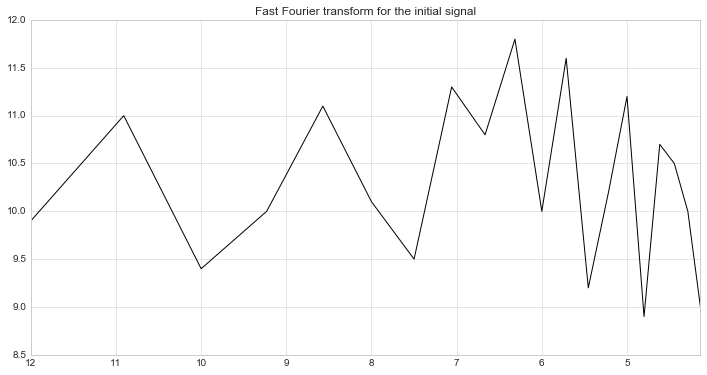

In [138]:
fft_yakutsk = np.abs(np.fft.rfft(yakutsk_df))
plt.figure(figsize=(12, 6))
plt.plot(120 / (np.arange(20) + 10), fft_yakutsk[1:21], color="black")
plt.xlim((120 / (np.arange(20) + 10))[0], (120 / (np.arange(20) + 10))[-1])
plt.title('Fast Fourier transform for the initial signal')
plt.grid(True)
plt.show()

## Temperature trends for London, Paris, Lisbon and Sydney

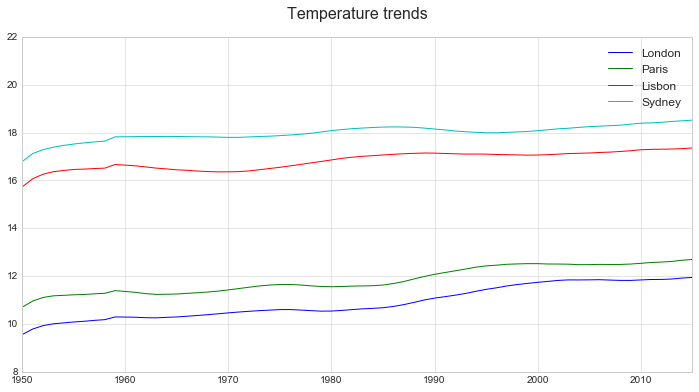

In [106]:
plt.xlim(1950, 2015)
plt.ylim(8, 22)

london_df = pd.read_csv('cities_data/london.csv', usecols=["0"] +
                        [str(k) for k in range(1950, 2019)]).transpose()
paris_df = pd.read_csv('cities_data/paris.csv', usecols=["0"] +
                        [str(k) for k in range(1950, 2019)]).transpose()
lisbon_df = pd.read_csv('cities_data/lisbon.csv', usecols=["0"] +
                        [str(k) for k in range(1950, 2019)]).transpose()
sydney_df = pd.read_csv('cities_data/sydney.csv', usecols=["0"] +
                        [str(k) for k in range(1950, 2019)]).transpose()
ssa_london = SSA(london_df.ix[:,0], 10)
london_comps = ssa_london.components_to_df()
ssa_paris = SSA(paris_df.ix[:,0], 10)
paris_comps = ssa_paris.components_to_df()
ssa_lisbon = SSA(lisbon_df.ix[:,0], 10)
lisbon_comps = ssa_lisbon.components_to_df()
ssa_sydney = SSA(sydney_df.ix[:,0], 10)
sydney_comps = ssa_sydney.components_to_df()

plt.title("Temperature trends", fontsize="16", y=1.04)
plt.plot(london_comps.iloc[:,0])
plt.plot(paris_comps.iloc[:,0])
plt.plot(lisbon_comps.iloc[:,0])
plt.plot(sydney_comps.iloc[:,0])
plt.legend(["London", "Paris", "Lisbon", "Sydney"]);

## Temperature trends for Yakutsk and Moscow

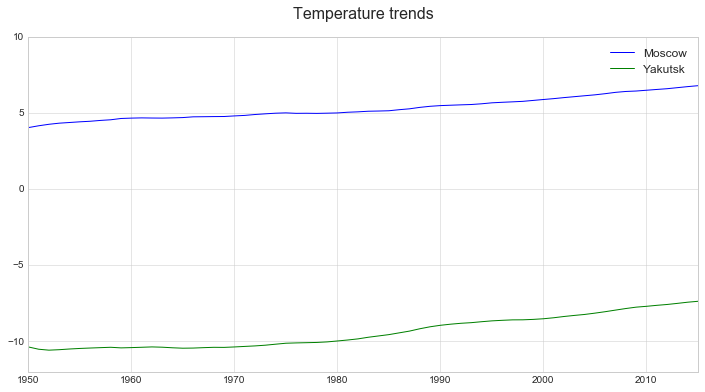

In [48]:
plt.xlim(1950, 2015)
plt.ylim(-12, 10)

moscow_df = pd.read_csv('cities_data/moscow.csv', usecols=["0"] +
                        [str(k) for k in range(1950, 2019)]).transpose()
yakutsk_df = pd.read_csv('cities_data/yakutsk.csv', usecols=["0"] +
                        [str(k) for k in range(1950, 2019)]).transpose()
ssa_moscow = SSA(moscow_df.ix[:,0], 10)
moscow_comps = ssa_moscow.components_to_df()
ssa_yakutsk = SSA(yakutsk_df.ix[:,0], 10)
yakutsk_comps = ssa_yakutsk.components_to_df()

plt.title("Temperature trends", fontsize="16", y=1.04)
plt.plot(moscow_comps.iloc[:,0])
plt.plot(yakutsk_comps.iloc[:,0])
plt.legend(["Moscow", "Yakutsk"]);